## Import Data

In [1]:
import numpy as np
import pandas as pd
import statsmodels.tsa.stattools as ts

from arch import arch_model
from matplotlib import pyplot
from numpy.random import seed
from numpy.random import randn
from random import gauss
from random import seed
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller

# seed pseudorandom number generator
seed(1)

# create dataset
mydata=pd.read_csv("mly833.csv")
mydata

data=mydata['rain']
data

0      193.0
1      295.4
2      127.9
3      106.1
4       53.9
       ...  
717    221.9
718    166.3
719    152.0
720    142.5
721    217.3
Name: rain, Length: 722, dtype: float64

## Data Converted to log format to smooth out extreme values and reduce volatility

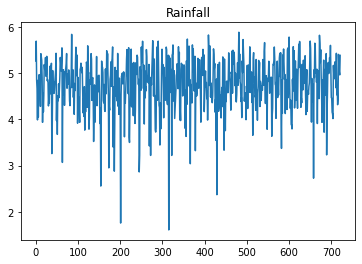

In [2]:
data=np.log(data)
pyplot.plot(data)
pyplot.title("Rainfall")
pyplot.show()

## Data is first differenced to approximate a Gaussian distribution

In [3]:
data=np.diff(data,1)

In [4]:
result = ts.adfuller(data, 1)
result

(-28.391942316308967,
 0.0,
 1,
 719,
 {'1%': -3.439477677285233,
  '5%': -2.865568186630048,
  '10%': -2.5689150720653977},
 1375.9113103540674)

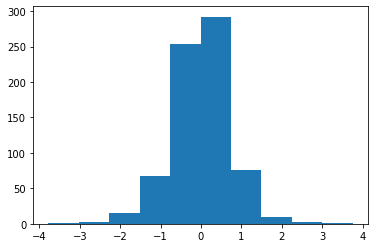

In [5]:
# plot
pyplot.hist(data)
pyplot.show()

## QQ Plot: Visual Screening for Normality

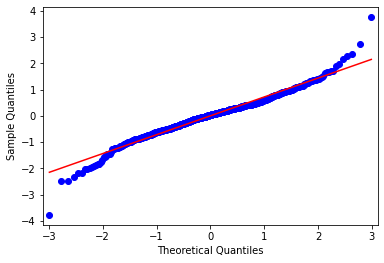

In [6]:
# seed the random number generator
seed(1)
# generate univariate observations
# q-q plot
qqplot(data, line='s')
pyplot.show()

## GARCH Modelling

In [7]:
# split into train/test
n_test = 50
train, test = data[:-n_test], data[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)

In [8]:
model

Zero Mean(constant: no, no. of exog: 0, volatility: GARCH(p: 15, q: 15), distribution: Normal distribution), id: 0x7fc4c9917908

In [9]:
train

array([ 4.25640181e-01, -8.37081662e-01, -1.86866663e-01, -6.77251568e-01,
        8.55480564e-01, -7.94310418e-01,  7.53258376e-01,  1.62683255e-01,
       -2.21922230e-01,  1.72865152e-02, -4.81552495e-01,  1.13937880e+00,
       -6.03749859e-02, -8.04749872e-02, -3.73532791e-01, -9.69265586e-01,
        6.32644860e-01, -4.05984994e-01,  3.54801115e-01,  6.65413845e-01,
       -1.02365381e-01,  6.51224628e-02,  1.91232890e-01, -4.05224057e-01,
        3.20198112e-02,  3.98907708e-01, -5.25659413e-01,  2.27907703e-02,
       -6.66645817e-02, -5.01730894e-01,  1.98423504e-01, -1.38525362e-01,
        7.48437644e-01,  5.12321678e-02, -5.97942592e-01,  4.90127136e-01,
        1.69191316e-01, -1.95193591e+00,  5.92051064e-01,  1.20226923e+00,
       -4.56287387e-01,  2.23345347e-01, -2.60348541e-01,  5.40121082e-02,
        1.70178016e-01,  1.19733712e-01,  1.51283066e-01,  3.71937581e-01,
       -1.45409380e+00,  5.10825624e-01, -8.09236736e-01,  8.31584034e-01,
       -1.05974578e-01,  

In [10]:
test

array([ 1.36914939, -0.18626492, -0.40223756,  0.27688283, -0.5656396 ,
       -0.36852159, -0.63575851,  0.91433187, -0.21241697,  0.24710253,
        0.39582281, -1.55776223,  1.35431132, -0.5077055 , -0.04350819,
        0.42975202,  0.46593751, -2.18884526,  0.91233033,  0.44996288,
        0.61200738,  0.02171638, -0.23775025,  0.18820792,  0.15543976,
       -0.13256568,  0.39715711, -0.55388511, -0.57407465, -0.01268029,
       -0.30248562, -0.03677473, -0.10283024,  1.14963479, -0.20697986,
       -0.08051164,  0.13790444,  0.22764866, -0.30708288, -0.25398823,
        0.74506586, -0.89798159,  0.17672638, -0.39019764,  0.11718868,
        0.97022026, -0.28843344, -0.08991287, -0.06453852,  0.42193689])

In [11]:
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)

Iteration:      1,   Func. Count:     33,   Neg. LLF: 731.2515255566047
Iteration:      2,   Func. Count:     70,   Neg. LLF: 731.087019036879
Iteration:      3,   Func. Count:    104,   Neg. LLF: 716.5753018199362
Iteration:      4,   Func. Count:    139,   Neg. LLF: 715.8159708244727
Iteration:      5,   Func. Count:    173,   Neg. LLF: 713.4118695707821
Iteration:      6,   Func. Count:    208,   Neg. LLF: 713.2474199105429
Iteration:      7,   Func. Count:    242,   Neg. LLF: 712.5659467807859
Iteration:      8,   Func. Count:    276,   Neg. LLF: 710.5173347979667
Iteration:      9,   Func. Count:    310,   Neg. LLF: 709.7139058131587
Iteration:     10,   Func. Count:    344,   Neg. LLF: 708.9899753602278
Iteration:     11,   Func. Count:    378,   Neg. LLF: 707.1499209592771
Iteration:     12,   Func. Count:    412,   Neg. LLF: 707.0604807061865
Iteration:     13,   Func. Count:    446,   Neg. LLF: 706.8628766864312
Iteration:     14,   Func. Count:    480,   Neg. LLF: 706.4696663

In [12]:
yhat

In [13]:
test=pd.DataFrame(test)

## Comparison of Predicted Variance and actual 10-day Rolling Variance

Text(0.5, 1.0, '10-day Rolling Variance')

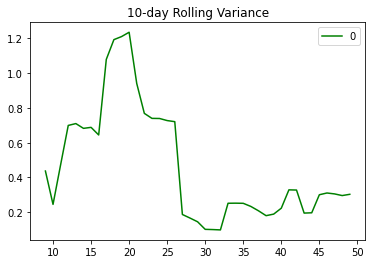

In [14]:
# Rolling Window
test.rolling(window=10).var().plot(style='g')
pyplot.title("10-day Rolling Variance")

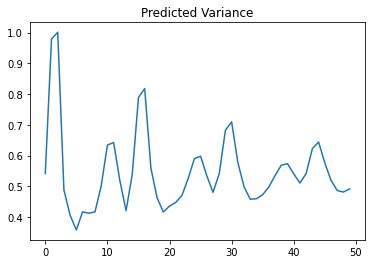

In [15]:
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.title("Predicted Variance")
pyplot.show()

## References

### [- Machine Learning Mastery: How to Model Volatility with ARCH and GARCH for Time Series Forecasting in Python](https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/)

### [- Met Eireann - Irish Weather Data](https://www.met.ie/climate/available-data/historical-data)